## Beforehand...
### import nessasary libraries.

In [ ]:
import nltk
import re
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Read the data

In [ ]:
bully = pd.read_csv("stemmed.csv")

In [ ]:
bully.head()

Unnamed: 0                                           comments  bullying  \
0           0             ['came', 'comment', 'grab', 'popcorn']         0   
1           1       ['hey', 'nt', 'racist', 'oh', 'ok', 'thank']         0   
2           2  ['race', 'exist', 'mean', 'race', 'nt', 'real'...         0   
3           3       ['everyth', 'normal', 'see', 'alien', 'eye']         0   
4           4  ['racism', 'stop', 'one', 'stop', 'think', 'on...         0   

   race and culture  sexuality  intelligence and appearance  
0                 0          0                            0  
1                 0          0                            0  
2                 0          0                            0  
3                 0          0                            0  
4                 0          0                            0

In [ ]:
race_culture= bully[bully['race and culture'] == 1]
sexuality= bully[bully['sexuality'] == 1]   
intelligence= bully[bully['intelligence and appearance'] == 1] 

In [ ]:
race_culture.head()

Unnamed: 0                                           comments  bullying  \
847          847              ['around', 'black', 'never', 'relax']         1   
1404        1404                                        ['america']         1   
1468        1468  ['nt', 'know', 'hell', 'even', 'happen', 'gon'...         1   
1483        1483                                ['allahu', 'akbar']         1   
1494        1494                  ['bulli', 'middl', 'east', 'get']         1   

      race and culture  sexuality  intelligence and appearance  
847                  1          0                            0  
1404                 1          0                            0  
1468                 1          0                            0  
1483                 1          0                            0  
1494                 1          0                            0

In [ ]:
sexuality.head()

Unnamed: 0                                           comments  bullying  \
968          968                      ['take', 'shirt', 'onscreen']         1   
1349        1349                           ['homophob', 'u', 'say']         1   
1394        1394  ['moist', 'spill', 'blood', 'curs', 'one', 'fl...         1   
1405        1405  ['aaahhh', 'ye', 'beauti', 'death', 'warm', 'h...         1   
1481        1481                   ['thank', 'good', 'gay', 'club']         1   

      race and culture  sexuality  intelligence and appearance  
968                  0          1                            0  
1349                 0          1                            0  
1394                 0          1                            0  
1405                 0          1                            0  
1481                 0          1                            0

In [ ]:
intelligence.head()

Unnamed: 0                                           comments  bullying  \
227          227  ['polit', 'doom', 'folk', 'pseudosci', 'evil',...         1   
639          639                         ['race', 'real', 'stupid']         1   
1521        1521  ['import', 'publish', 'video', 'snapchat', 'fi...         1   
1860        1860                ['credit', 'girl', 'noo', 'stupid']         1   
1907        1907  ['stupid', 'girl', 'runnn', 'get', 'stay', 'lo...         1   

      race and culture  sexuality  intelligence and appearance  
227                  0          0                            1  
639                  0          0                            1  
1521                 0          0                            1  
1860                 0          0                            1  
1907                 0          0                            1

### Drop the first column (index)

In [ ]:
bully=bully.drop(bully.columns[0], axis=1)

In [ ]:
bully.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19675 entries, 0 to 19674
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   comments                     19675 non-null  object
 1   bullying                     19675 non-null  int64 
 2   race and culture             19675 non-null  int64 
 3   sexuality                    19675 non-null  int64 
 4   intelligence and appearance  19675 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 768.7+ KB


## More Data Analysis

### Create stopword 

In [ ]:
stopw = set(stopwords.words("english"))

### Wordcloud

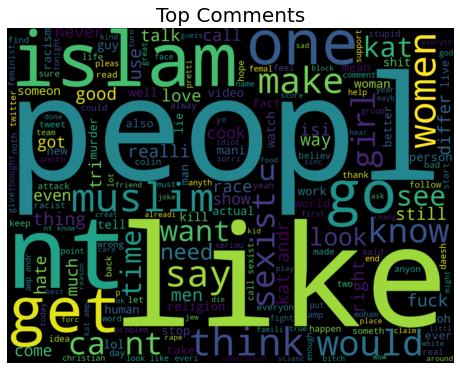

In [ ]:
textt = " ".join(comments for comments in bully.comments)
textt=re.sub(r'([^\s\w]|_)+', '', textt)
plt.rcParams['figure.figsize'] = (8, 8)
plt.style.use('fast')
wordcloud = WordCloud(width=1600, height=1200,stopwords=stopw).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud1.png')
plt.title('Top Comments', fontsize = 20)
plt.show()

#### Split comments into positive and negative sentiment:

In [ ]:
positive = bully[bully['bullying'] == 1]
negative = bully[bully['bullying'] == 0]

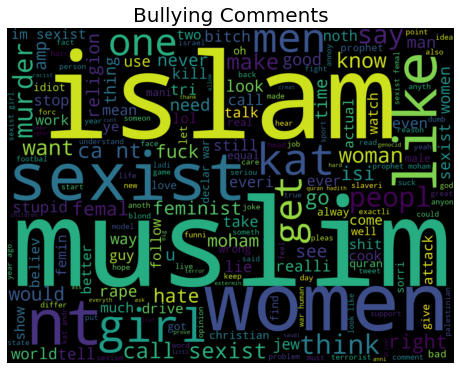

In [ ]:
textt = " ".join(comments for comments in positive.comments)
textt=re.sub(r'([^\s\w]|_)+', '', textt)
plt.rcParams['figure.figsize'] = (8, 8)
plt.style.use('fast')
wordcloud = WordCloud(width=1600, height=1200,stopwords=stopw).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud2.png')
plt.title('Bullying Comments', fontsize = 20)
plt.show()

#### Some words are removed since they appeared in bullying comments

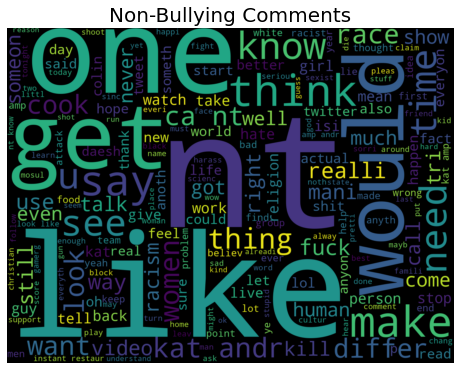

In [ ]:
stopw.update(["islam","good","go","great","muslim","love","peopl"])
textt = " ".join(comments for comments in negative.comments)
textt=re.sub(r'([^\s\w]|_)+', '', textt)
plt.rcParams['figure.figsize'] = (8, 8)
plt.style.use('fast')
wordcloud = WordCloud(width=1600, height=1200,stopwords=stopw).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud3.png')
plt.title('Non-Bullying Comments', fontsize = 20)
plt.show()

### Bar chart

#### Bullying vs non-bullying

In [ ]:
graph=bully.copy()
graph['bullying'] = graph['bullying'].replace({0 : 'Non-Bullying'})
graph['bullying'] = graph['bullying'].replace({1 : 'Bullying'})
fig = px.histogram(graph, x="bullying",width=500, height=400)
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [ ]:
df_bully = bully.drop(['comments'], axis=1)
counts = []
categories = list(df_bully.columns.values)
for i in categories:
    counts.append((i, df_bully[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_stats

category  number_of_comments
0                     bullying                5405
1             race and culture                2009
2                    sexuality                3387
3  intelligence and appearance                  11

#### Count for each label ( 4 in total)

Text(0.5, 0, 'category')

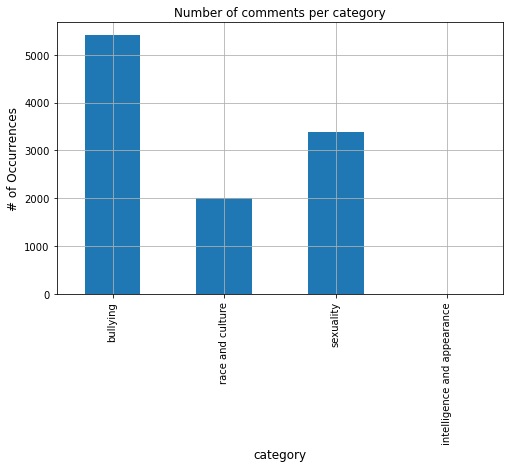

In [ ]:
df_stats.plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of comments per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)

## Text Processing

In [ ]:
# Author: LIM HANG SHEN
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
def remove_at(x):
    #remove phrases that start with @, #, http
    token = x.split()
    out = []
    stopphrases = ['@','RT','http', '#']
    for i in token:
        i = str(i)
        for stopphrase in stopphrases:
            if stopphrase in i:
                out.append(i)
                break
    token  = [item.lower() for item in token if item not in out]
    z = " ".join(token)
    #remove punctuation from indivual words and remove non alphanumeric words
    token = word_tokenize(z)
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in token]
    words = [word for word in stripped if word.isalpha()]
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    #stemming
    porter = PorterStemmer()
    words = [porter.stem(word) for word in words]
    return words
    


## Multi-lable Text Classification Model with Multiple Output Layers
#### The input to the model will be the comments (X) only, whereas the output will be four labels (y)

In [ ]:
X = bully.comments
y = bully.iloc[:,[1,2,3,4]]

#### Input ( comments )

In [ ]:
X.head()

0               ['came', 'comment', 'grab', 'popcorn']
1         ['hey', 'nt', 'racist', 'oh', 'ok', 'thank']
2    ['race', 'exist', 'mean', 'race', 'nt', 'real'...
3         ['everyth', 'normal', 'see', 'alien', 'eye']
4    ['racism', 'stop', 'one', 'stop', 'think', 'on...
Name: comments, dtype: object

#### Output labels ( bullying, race and culture, sexuality, intelligence and appearance )


In [ ]:
y.head()

bullying  race and culture  sexuality  intelligence and appearance
0         0                 0          0                            0
1         0                 0          0                            0
2         0                 0          0                            0
3         0                 0          0                            0
4         0                 0          0                            0

### Split dataset into training set and test set

In [ ]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

### Convert the comments into a vector of term counts

In [ ]:
cv = CountVectorizer(stop_words='english')
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

### Building Decision Tree Model


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7818058614263934


### User input prediction ( bullying or not and it's type of bullying )

In [ ]:
user_input = input("Enter a comment : ")
user_comment = []
user_comment.append(remove_at(user_input))
user_comment = pd.Series(user_comment).apply(str)

user_comment = cv.transform(user_comment)
result=clf.predict(user_comment)

print('Prediction : ',result)
if result[0][0]==0:
    print("This is a non-bullying comment.\n")
    
else:
    if result[0][1]==1:
        print("This is a bullying comment regarding race and culture.\n")
        
    elif result[0][2]==1:
        print("This is a bullying comment regarding sexuality.\n")
        
    elif result[0][3]==1:
         print("This is a bullying comment regarding intelligence and appearance.\n")


Enter a comment : I hate women
Prediction :  [[1 0 1 0]]
This is a bullying comment regarding sexuality.

